### Today:
* Support Vector Machine
    * Linear SVM
        * Hard-margin
        * Soft-margin
    * Nonlinear SVM

### Resources:
* Support Vector Machine: https://www.svm-tutorial.com/
* Support Vector Machine: http://cs229.stanford.edu/notes/cs229-notes3.pdf
* Support Vector Machine: http://web.mit.edu/zoya/www/SVM.pdf

# Soft-margin SVM

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.reset_default_graph()

In [2]:
# Load dataset as numpy array
data = np.loadtxt('../../data/03_LogisticRegression/lr_data.csv', delimiter=',')

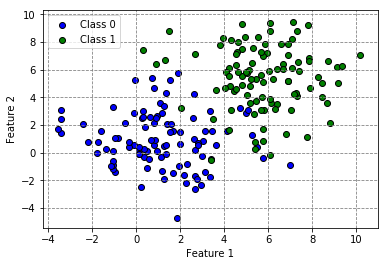

In [3]:
# Find index of samples with class 0
idx = data[:, 2] == 0.0

# Plot dataset
fig, ax = plt.subplots()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.scatter(data[idx][:, 0], data[idx][:,1], c='b', edgecolors='k', label='Class 0')
ax.scatter(data[~idx][:,0], data[~idx][:,1], c='g', edgecolors='k', label='Class 1')
ax.grid(True, color='gray', linestyle='dashed')
ax.legend()

In [4]:
# Split dataset on features and labels
x_data = data[:, :2]
y_data = data[:, 2].reshape(len(data), 1)
print(x_data.shape, y_data.shape)

(200, 2) (200, 1)


In [7]:
# Convert labels to -1, 1
y_data[y_data==0] = -1

In [21]:
# Data parameters
n_features = 2
n_labels = 1

train_size = len(data) # 300
# train_split = 0.85 # 85% data in train set, 15% in test set
# split = int(train_split * train_size) # Split boundry, check for yourself!

# Training parameters
n_epoch = 100
svmC = 1
batch_size = 100

## Model

In [22]:
# Graph input
X = tf.placeholder(tf.float32, [None, n_features], "X")
y = tf.placeholder(tf.float32, [None, n_labels], "y")

# Model parameters
W = tf.Variable(tf.zeros([n_features, n_labels])) # random_normal
b = tf.Variable(tf.zeros([n_labels]))

In [23]:
hypothesis = tf.add(tf.matmul(X, W), b)

## Cost

In [24]:
regularization_loss = 0.5 * tf.reduce_sum(tf.square(W)) 
hinge_loss = tf.reduce_sum(tf.maximum(tf.zeros([batch_size, 1]),  1 - y * hypothesis));
svm_loss = regularization_loss + svmC * hinge_loss

## Optimization

In [25]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(svm_loss)

## Evaluation

In [26]:
predicted_class = tf.sign(hypothesis)
correct_prediction = tf.equal(y, predicted_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

## Train

In [50]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    # Iterate and train.
    for step in range(n_epoch * train_size // batch_size):
        
        offset = (step * batch_size) % train_size
        
        batch_data = x_data[offset:(offset + batch_size), :]
        batch_labels = y_data[offset:(offset + batch_size)]
        
        train_step.run(feed_dict={X: batch_data, y: batch_labels})
        
        print('loss: ', svm_loss.eval(feed_dict={X: batch_data, y: batch_labels}))
    
    eval_fun = lambda X: predicted_class.eval(feed_dict={x:X})
    print("Accuracy on train:", accuracy.eval(feed_dict={X: x_data, y: y_data}))
    W_e, b_e = W.eval(), b.eval()

loss:  310.24094
loss:  191.38383
loss:  120.67768
loss:  42.4725
loss:  145.2155
loss:  323.91782
loss:  266.54263
loss:  155.59915
loss:  85.405365
loss:  25.414406
loss:  103.460594
loss:  310.20538
loss:  251.5874
loss:  150.94864
loss:  80.704094
loss:  23.006945
loss:  55.94291
loss:  256.0666
loss:  191.11568
loss:  107.4217
loss:  40.858482
loss:  19.993053
loss:  23.699492
loss:  24.003094
loss:  60.694088
loss:  17.414022
loss:  25.506239
loss:  84.799774
loss:  26.172161
loss:  28.787527
loss:  80.29953
loss:  27.918875
loss:  14.487747
loss:  24.894268
loss:  16.052647
loss:  28.546886
loss:  14.250012
loss:  23.274965
loss:  14.115085
loss:  17.168552
loss:  14.448767
loss:  22.683418
loss:  14.100664
loss:  18.65981
loss:  16.750072
loss:  30.829367
loss:  14.086564
loss:  17.491003
loss:  16.789549
loss:  32.787754
loss:  14.28357
loss:  16.218374
loss:  16.434965
loss:  33.99822
loss:  14.212394
loss:  17.38698
loss:  14.113884
loss:  23.020094
loss:  14.134374
loss:  1

In [51]:
eval_fun

<function __main__.<lambda>>

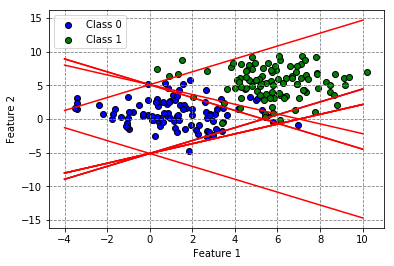

In [48]:
# x = np.linspace(-4, 10, 100)
# ax.plot(x, -W_e[0][0] * x - b_e[0], c='r')
# ax.plot(x, -W_e[1][0] * x - b_e[0], c='r')
# fig